In [17]:
import pandas as pd
import psycopg2 as pg
import matplotlib.pyplot as plt
import numpy as np

DADOS DE CONEXÃO FORAM OCULTADOS POR SEGURANÇA

In [3]:

conexao = pg.connect(
    database="******",
    user="******",
    password="******",
    host="******",
    port="****"
)

cursor = conexao.cursor()

consulta = """
SELECT vis.macrorregiao
--, vis.cod_ibge_6
--, vis.municipio 
, to_char(sed."Ano da Semana", 'fm0000') AS ano
, to_char(sed."Semana Epidemiológica", 'fm00') as semana
, count(case when db.data_sin_pri is not null then 1 end) AS numero_de_casos
, min(sed."Data" ) data_referencia
FROM (SELECT dt::date FROM generate_series ( '2017-01-01'::date, '2023-12-31'::date, '1 day'::interval) dt) as calend
join public.semana_epidemiologica_datas sed  on calend.dt = sed."Data" 
JOIN ibge.vw_ibge_sc vis on vis.uf = 'SC' 
left join sinan.dengue_bi db on db.data_sin_pri = sed."Data" and vis.cod_ibge_6 = db.municipio
where sed."Ano da Semana" >= 2017
--and vis.cod_ibge_6 = '420245'
GROUP BY ano
, semana
, vis.macrorregiao
--,  vis.cod_ibge_6
--, vis.municipio 
order by 1, 2, 3, 4, 5
"""
cursor.execute(consulta)
resultados = cursor.fetchall()
data_real = pd.DataFrame(resultados, columns=[desc[0] for desc in cursor.description])

data_real['data_referencia'] = pd.to_datetime(data_real['data_referencia'], format='%Y-%m')

data_real = data_real[['macrorregiao', 'numero_de_casos', 'data_referencia']]
data_real

,macrorregiao,numero_de_casos,data_referencia
0,FOZ DO RIO ITAJAI,36,2017-01-01
1,FOZ DO RIO ITAJAI,28,2017-01-08
2,FOZ DO RIO ITAJAI,29,2017-01-15
3,FOZ DO RIO ITAJAI,28,2017-01-22
4,FOZ DO RIO ITAJAI,23,2017-01-29
...,...,...,...
2557,VALE DO ITAJAI,16,2023-11-26
2558,VALE DO ITAJAI,13,2023-12-03
2559,VALE DO ITAJAI,8,2023-12-10
2560,VALE DO ITAJAI,0,2023-12-17


In [4]:
########################### CONEXAO TABELA IMUNIZAÇÃO ###########################

conexao = pg.connect(database = "******",
                           host="******",
                           user="******",
                           password="******",
                           port="****")


cursor = conexao.cursor()
query = "SELECT * FROM projetados.semana_imunologica_macrorregiao"
cursor.execute(query)
resultados = cursor.fetchall()

data_projetado = pd.DataFrame(resultados, columns=[desc[0] for desc in cursor.description])

data_projetado.head(5)

,data_referencia,numero_de_casos,macrorregiao
0,2024-01-01,14,VALE DO ITAJAI
1,2024-01-08,16,VALE DO ITAJAI
2,2024-01-15,21,VALE DO ITAJAI
3,2024-01-22,38,VALE DO ITAJAI
4,2024-01-29,48,VALE DO ITAJAI


In [5]:
data_projetado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   data_referencia  364 non-null    object
 1   numero_de_casos  364 non-null    int64 
 2   macrorregiao     364 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.7+ KB


In [6]:
data_projetado['data_referencia'] = pd.to_datetime(data_projetado['data_referencia'], format='%Y-%m-%d')

In [7]:
fozdorioitajai = data_projetado[data_projetado['macrorregiao']=='FOZ DO RIO ITAJAI']
grandefloripa = data_projetado[data_projetado['macrorregiao']=='GRANDE FLORIANOPOLIS']
grandeoeste = data_projetado[data_projetado['macrorregiao']=='GRANDE OESTE']
meiooeste = data_projetado[data_projetado['macrorregiao']=='MEIO OESTE E SERRA']
norteenordeste = data_projetado[data_projetado['macrorregiao']=='NORTE E NORDESTE']
sul = data_projetado[data_projetado['macrorregiao']=='SUL']
valedoitajai = data_projetado[data_projetado['macrorregiao']=='VALE DO ITAJAI']



In [8]:
data_real

,macrorregiao,numero_de_casos,data_referencia
0,FOZ DO RIO ITAJAI,36,2017-01-01
1,FOZ DO RIO ITAJAI,28,2017-01-08
2,FOZ DO RIO ITAJAI,29,2017-01-15
3,FOZ DO RIO ITAJAI,28,2017-01-22
4,FOZ DO RIO ITAJAI,23,2017-01-29
...,...,...,...
2557,VALE DO ITAJAI,16,2023-11-26
2558,VALE DO ITAJAI,13,2023-12-03
2559,VALE DO ITAJAI,8,2023-12-10
2560,VALE DO ITAJAI,0,2023-12-17


In [9]:
data_projetado

,data_referencia,numero_de_casos,macrorregiao
0,2024-01-01,14,VALE DO ITAJAI
1,2024-01-08,16,VALE DO ITAJAI
2,2024-01-15,21,VALE DO ITAJAI
3,2024-01-22,38,VALE DO ITAJAI
4,2024-01-29,48,VALE DO ITAJAI
...,...,...,...
359,2024-11-25,7,MEIO OESTE E SERRA
360,2024-12-02,6,MEIO OESTE E SERRA
361,2024-12-09,6,MEIO OESTE E SERRA
362,2024-12-16,7,MEIO OESTE E SERRA


In [10]:
completo = pd.concat([data_projetado, data_real])
completo

,data_referencia,numero_de_casos,macrorregiao
0,2024-01-01,14,VALE DO ITAJAI
1,2024-01-08,16,VALE DO ITAJAI
2,2024-01-15,21,VALE DO ITAJAI
3,2024-01-22,38,VALE DO ITAJAI
4,2024-01-29,48,VALE DO ITAJAI
...,...,...,...
2557,2023-11-26,16,VALE DO ITAJAI
2558,2023-12-03,13,VALE DO ITAJAI
2559,2023-12-10,8,VALE DO ITAJAI
2560,2023-12-17,0,VALE DO ITAJAI


In [25]:
fozdorioitajai = completo[completo['macrorregiao']=='FOZ DO RIO ITAJAI']
grandefloripa = completo[completo['macrorregiao']=='GRANDE FLORIANOPOLIS']
grandeoeste = completo[completo['macrorregiao']=='GRANDE OESTE']
meiooeste = completo[completo['macrorregiao']=='MEIO OESTE E SERRA']
norteenordeste = completo[completo['macrorregiao']=='NORTE E NORDESTE']
sul = completo[completo['macrorregiao']=='SUL']
valedoitajai = completo[completo['macrorregiao']=='VALE DO ITAJAI']

In [26]:
fozdorioitajai = fozdorioitajai.sort_values(by='data_referencia', ascending=True)

data_corte = pd.to_datetime('2024-01-01')
cores = ['blue' if pd.to_datetime(data) >= data_corte else 'red' for data in fozdorioitajai['data_referencia']]

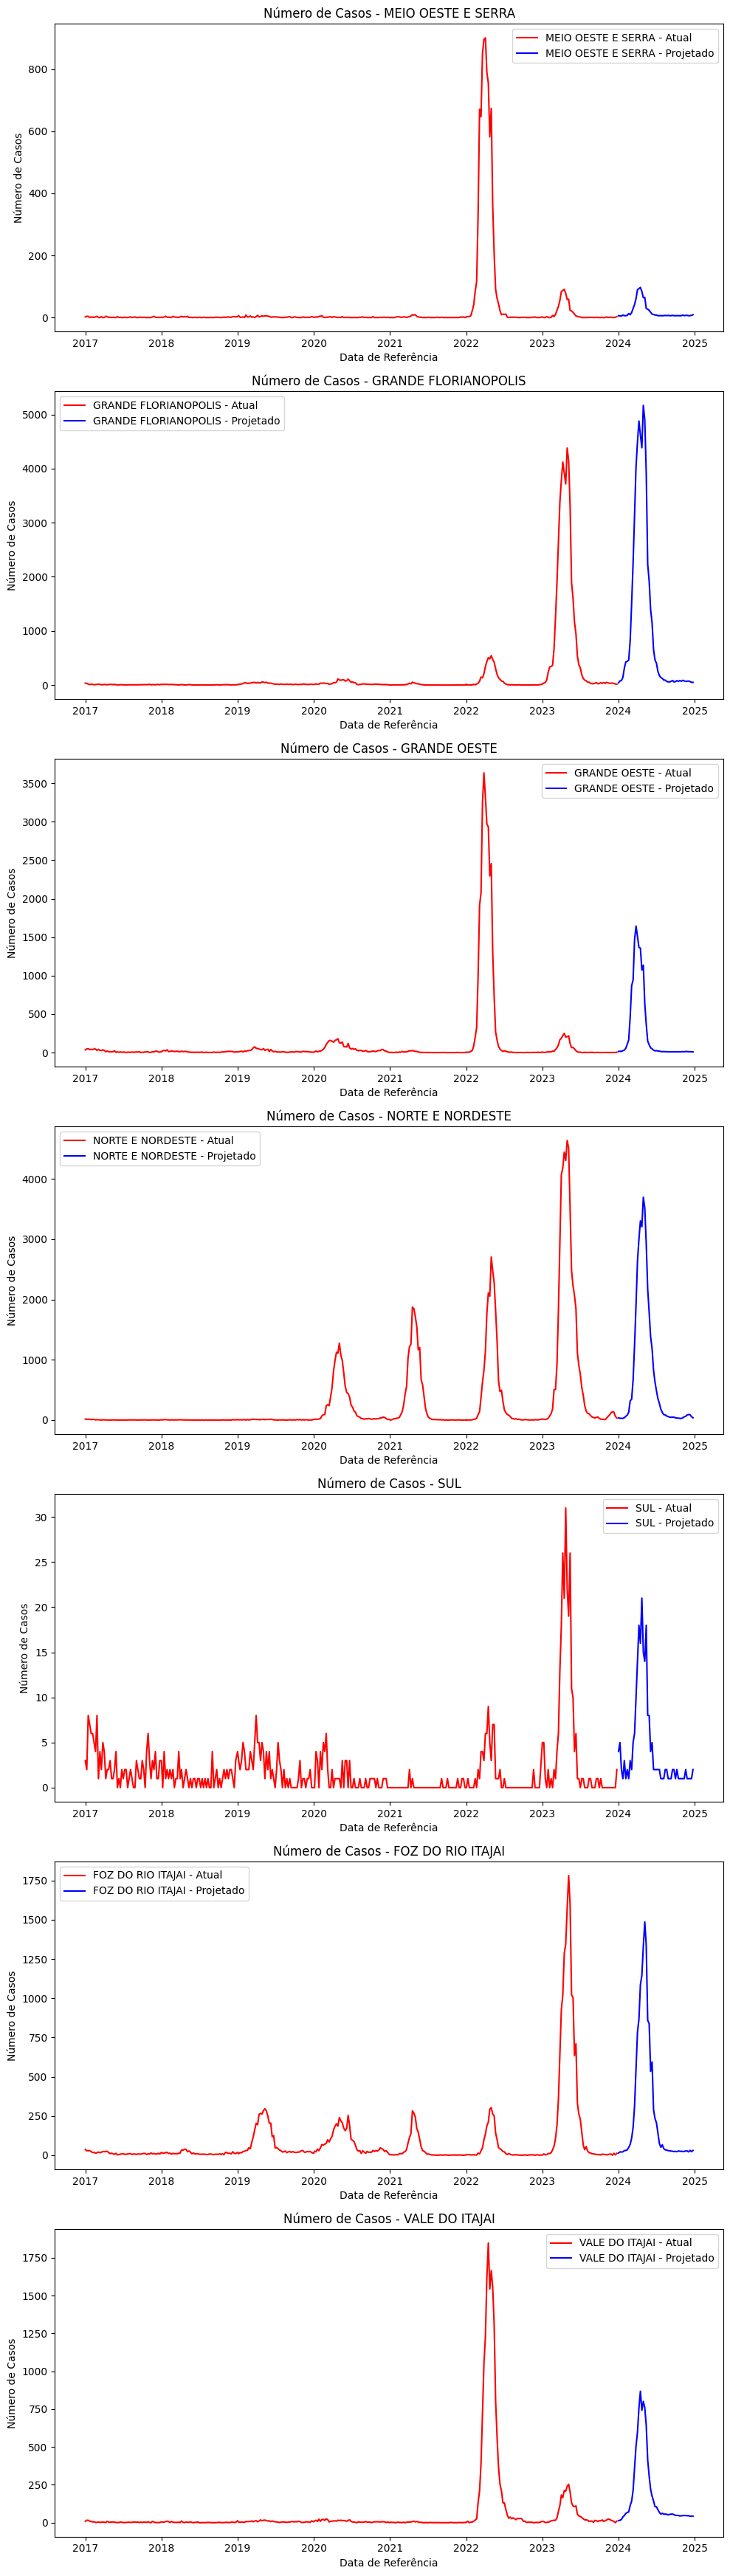

In [48]:
def plot_macroregiao(df, ax, region_name):
    region_data = df[df['macrorregiao'] == region_name]
    
    region_data = region_data.sort_values(by='data_referencia')

    cutoff = pd.to_datetime('2024-01-01')
    before_cutoff = region_data['data_referencia'] < cutoff
    after_cutoff = region_data['data_referencia'] >= cutoff

    ax.plot(region_data[before_cutoff]['data_referencia'], region_data[before_cutoff]['numero_de_casos'], color='red')
    
    ax.plot(region_data[after_cutoff]['data_referencia'], region_data[after_cutoff]['numero_de_casos'], color='blue')

    ax.set_title(f'Número de Casos - {region_name}')
    ax.set_xlabel('Data de Referência')
    ax.set_ylabel('Número de Casos')
    ax.legend([f'{region_name} - Atual', f'{region_name} - Projetado'])

macroregions = completo['macrorregiao'].unique()

fig, axs = plt.subplots(nrows=len(macroregions), ncols=1, figsize=(10, 5 * len(macroregions)))

if len(macroregions) == 1:
    axs = [axs]

for ax, region_name in zip(axs, macroregions):
    plot_macroregiao(completo, ax, region_name)

plt.tight_layout()
plt.show()


In [63]:
completo['ano'] = pd.to_datetime(completo['data_referencia']).dt.year
completo



fozdorioitajai = completo[completo['macrorregiao']=='FOZ DO RIO ITAJAI']
grandefloripa = completo[completo['macrorregiao']=='GRANDE FLORIANOPOLIS']
grandeoeste = completo[completo['macrorregiao']=='GRANDE OESTE']
meiooeste = completo[completo['macrorregiao']=='MEIO OESTE E SERRA']
norteenordeste = completo[completo['macrorregiao']=='NORTE E NORDESTE']
sul = completo[completo['macrorregiao']=='SUL']
valedoitajai = completo[completo['macrorregiao']=='VALE DO ITAJAI']

In [65]:
fozdorioitajai.groupby(['ano']).agg({'numero_de_casos':'sum'}).reset_index()

,ano,numero_de_casos
0,2017,651
1,2018,641
2,2019,4203
3,2020,4122
4,2021,1819
5,2022,2315
6,2023,15610
7,2024,13921


In [66]:
grandefloripa.groupby(['ano']).agg({'numero_de_casos':'sum'}).reset_index()

,ano,numero_de_casos
0,2017,452
1,2018,276
2,2019,1292
3,2020,1801
4,2021,354
5,2022,4890
6,2023,46692
7,2024,56507


In [67]:
grandeoeste.groupby(['ano']).agg({'numero_de_casos':'sum'}).reset_index()

,ano,numero_de_casos
0,2017,858
1,2018,540
2,2019,1072
3,2020,3029
4,2021,245
5,2022,29254
6,2023,2115
7,2024,14013


In [68]:
meiooeste.groupby(['ano']).agg({'numero_de_casos':'sum'}).reset_index()

,ano,numero_de_casos
0,2017,54
1,2018,58
2,2019,107
3,2020,51
4,2021,65
5,2022,8214
6,2023,693
7,2024,1000


In [69]:
norteenordeste.groupby(['ano']).agg({'numero_de_casos':'sum'}).reset_index()

,ano,numero_de_casos
0,2017,207
1,2018,136
2,2019,322
3,2020,13451
4,2021,16618
5,2022,22450
6,2023,50826
7,2024,37807


In [70]:
sul.groupby(['ano']).agg({'numero_de_casos':'sum'}).reset_index()

,ano,numero_de_casos
0,2017,133
1,2018,60
2,2019,112
3,2020,59
4,2021,8
5,2022,67
6,2023,245
7,2024,226


In [71]:

valedoitajai.groupby(['ano']).agg({'numero_de_casos':'sum'}).reset_index()

,ano,numero_de_casos
0,2017,199
1,2018,129
2,2019,376
3,2020,482
4,2021,87
5,2022,16252
6,2023,2729
7,2024,9623


In [72]:
completo.groupby(['ano']).agg({'numero_de_casos':'sum'}).reset_index()

,ano,numero_de_casos
0,2017,2554
1,2018,1840
2,2019,7484
3,2020,22995
4,2021,19196
5,2022,83442
6,2023,118910
7,2024,133097
